# Árvore de Decisão
 
 Legendas:
   * <code style="color:green">Explicação Conteúdo</code>
   * <code style="color:purple">Dicas / Comandos / Comentários</code>
   * <code style="color:red">Prática</code>

### <code style="color:green">O que é a Árvore de Decisão?</code>

A árvore de decisão é um modelo bastante usado em Machine Learning porque é fácil de entender e aplicar (mas isso depende do ponto de vista). 

Ela funciona como um conjunto de regras que vão guiando o caminho para chegar a uma conclusão. Imagine que cada vez que o modelo toma uma decisão, ele está olhando para uma das variáveis do seu conjunto de dados (chamadas de variáveis X, inputs ou features). A árvore faz perguntas simples, como: "esta variável X1 é maior que um determinado valor, será que a dúvida no Y diminui?", e a partir daí, segue por um caminho diferente dependendo da resposta.

Cada caminho leva a uma conclusão final, que não é só uma "classe" ou resposta fechada. Em vez disso, no caso de uma classificação, a árvore te dá uma probabilidade (quantidade de linhas em que y=1 dividido pelo volume de linhas no nó em questão) de algo acontecer (também questionável em alguns pontos de vistas). 

No caso de uma árvore de regressão (quando Y é numérico), ela te dá um valor numérico (média do y naquela folha). O mais bacana da árvore de decisão é que, no fim das contas, você consegue ver claramente quais regras o modelo usou para chegar no resultado, o que facilita bastante o entendimento (se seu objetivo não for de generalização, porque dai fica dificil interpretar).

Gini e Entropia são as medidas do grau de impureza de um nó. Quanto menor o Gini ou entropia, melhor. Como sabemos estas são medidas do nó e por isso, para podermos escolher a melhor variável a quebrar, precisamos do Ganho de cada variáveis. Inclusive o ganho que nos ajuda fazer o controle do crescimento da árvore como um hiper parâmetro cost complexity. No entanto existem outros hiper parêmetros como o nível de profundidade, o tamanho do nó a ser dividido ou o tamanho da folha.

<code style="color:red">Prática</code>

Aqui fica a recomendação para você procurar pelo manual da scikit learn e e ler os hiper parâmetros das funções que vamos trabalhar aqui.

Carregando as bibliotecas necessárias:

In [1]:
from sklearn.tree import plot_tree, DecisionTreeClassifier #importando as funções de visualizar a árvore e criar a árvore
from matplotlib import pyplot as plt # importando a biblioteca de visualização de dados 
import pandas as pd # importando a biblioteca de manipulação de dados

### <code style="color:green">Exemplo células</code>

Utilizaremos os mesmos exemplos realizados no IDA, apenas para mostrar a estrutura do código:

In [2]:
# carregando os dados
base_celulas = pd.read_excel("dados/celulas.xlsx")
base_celulas

,Nucleos,Caudas,Cor,Membrana,Classe
0,1,1,Clara,Fina,Lethargia
1,2,1,Clara,Fina,Lethargia
2,1,1,Clara,Grossa,Lethargia
3,1,1,Escura,Fina,Lethargia
4,1,1,Escura,Grossa,Lethargia
5,2,2,Clara,Fina,Burpoma
6,2,2,Escura,Fina,Burpoma
7,2,2,Escura,Grossa,Burpoma
8,2,1,Escura,Fina,Saudável
9,2,1,Escura,Grossa,Saudável


In [3]:
#No python é comum definir objetos diferentes sendo o Y e os x's.
#muda a forma de olhar, pois vamos ter um objeto que representa apenas a respota, e outro que são as variáveis de suporte
#e então o modelo é criado conforme a "carcaça", o "molde".

#para definir o que são as variáveis X eu só deletei a variável Classe
X = base_celulas.drop(["Classe"], axis = 1)
X.head()

,Nucleos,Caudas,Cor,Membrana
0,1,1,Clara,Fina
1,2,1,Clara,Fina
2,1,1,Clara,Grossa
3,1,1,Escura,Fina
4,1,1,Escura,Grossa


In [4]:
#para definir o Y selecionei apenas a coluna Classe
y = base_celulas["Classe"]
y.head()

0    Lethargia
1    Lethargia
2    Lethargia
3    Lethargia
4    Lethargia
Name: Classe, dtype: object

In [5]:
#Na árvore de decisão do python você precisa criar as dummies das variáveis X para colocar na árvore
#aqui estou utilizando a get_dummies do pandas. Deixarei uma nota abaixo com a explicação do porquê 
#esta função e não a OneHotEnconder (já explico as diferenças)

#criando dummie das variáveis X's categóricas, utilizando a função drop_first
X = pd.get_dummies(X, columns=['Cor', 'Membrana'], drop_first=True)
X

,Nucleos,Caudas,Cor_Escura,Membrana_Grossa
0,1,1,False,False
1,2,1,False,False
2,1,1,False,True
3,1,1,True,False
4,1,1,True,True
5,2,2,False,False
6,2,2,True,False
7,2,2,True,True
8,2,1,True,False
9,2,1,True,True


In [6]:
#criando a carcaça do modelo
#repare que aqui é só a definição do modelo, olha ali os hiper parâmetros:
celulas_tree_model = DecisionTreeClassifier(random_state = 42, #semente para aleatórios
                                  min_samples_split = 2,  #tamanho min do nó a ser dividido
                                  ccp_alpha = 0,  #cost complexity
                                  max_depth = 5,  # profundidade máxima
                                  criterion='gini') #método poderia ser: entropy

#agora sim estou mandando executar o modelo
celulas_tree_model.fit(X, y) # treinamento do modelo

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, random_state=42)

In [7]:
print(celulas_tree_model.classes_)

['Burpoma' 'Lethargia' 'Saudável']


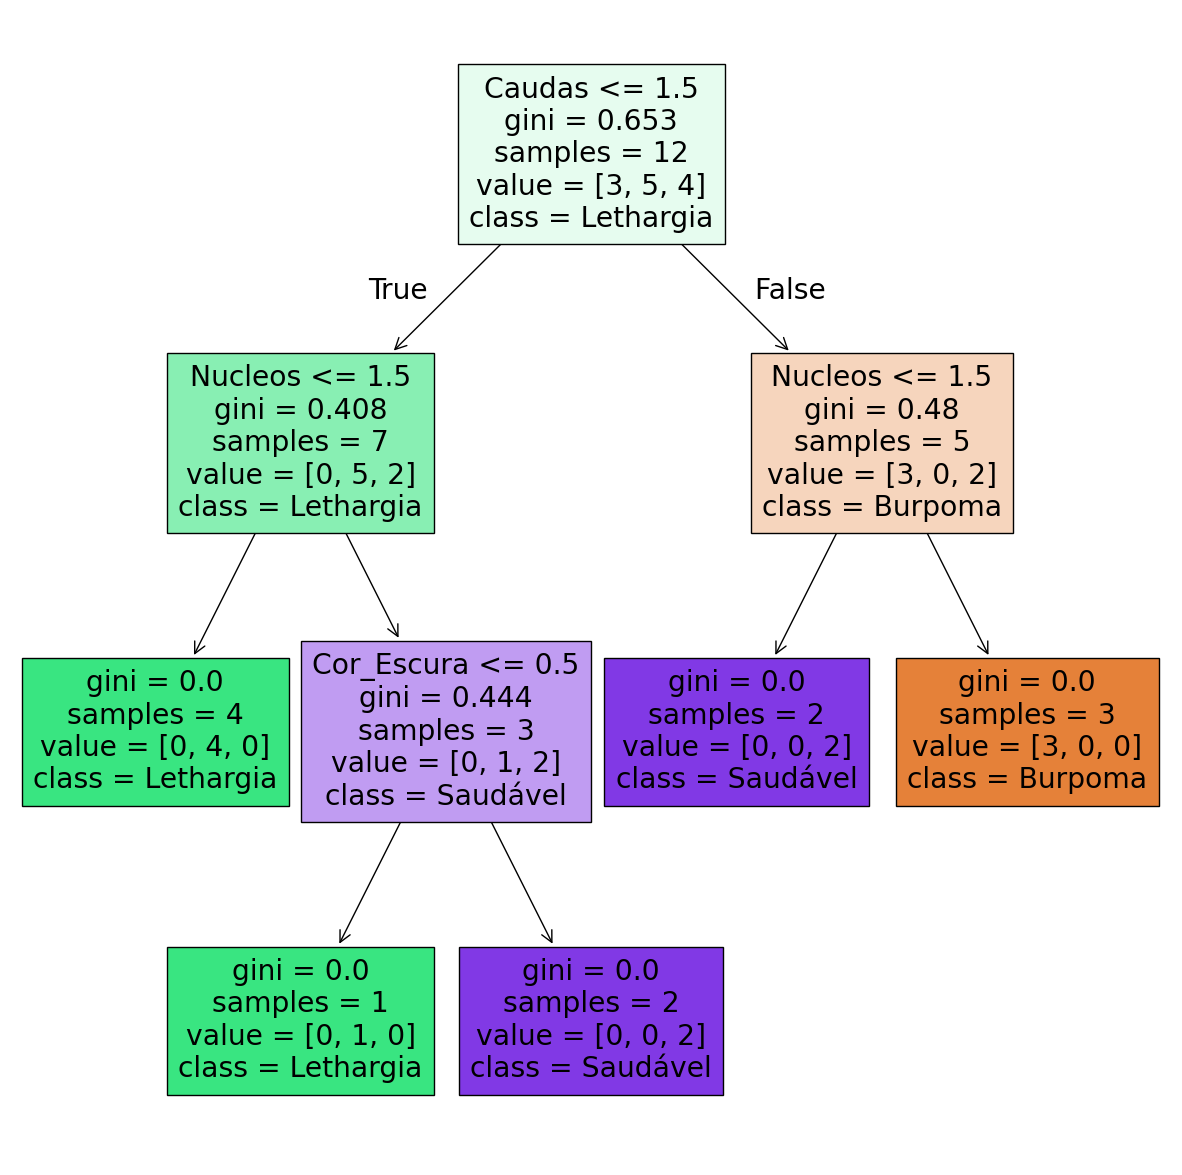

In [8]:
#pedindo o desenho da árvore de decisão
plt.figure(figsize=(15, 15)) # aumentanto o tamanho do gráfico
plot_tree(celulas_tree_model, # especificando o modelo
          feature_names=X.columns, # especificando o nome das variáveis que estamos usando para a classificação
          class_names= celulas_tree_model.classes_, #adicionando nome das classes
          #para saber os valores do y, você pode utilizar o comando print(celulas_tree_model.classes_)
          filled=True) # em cada nó, irá mostrar uma cor relacionada a cada categoria mais frequente da variável resposta
plt.show() # comando para visualizar a árvore

### <code style="color:purple">Interpretando a Árvore:</code>

Vamos analisar individualmente o que sai dentro de um nó da árvore?
Começando pelo nó raiz:

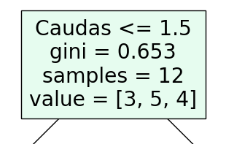


As duas últimas informações representam a quantidade de indivíduos naquele nó (samples) e também a quantidade de cada possível valor em Y(value), seguindo a ordem do seu y (print(celulas_tree_model.classes_)).

     - Vamos entender essa última frase: O value indica a quantidade de indivíduos de cada classe no nó, na ordem definida por celulas_tree_model.classes_ (geralmente é a ordem alfabética, mas é importante confirmar com o comando, pois depende da codificação interna).
             - Sendo assim, isso quer dizer que no nó raiz temos 3 Burpomas, 5 Lethargia e 4 Saudáveis.


As primeiras informações indicam a variável usada na divisão. Por exemplo, `Caudas <= 1.5` significa que:
- Valores menores ou iguais a 1.5 vão para a esquerda (marcado como True).
- Valores maiores que 1.5 vão para a direita (marcado como False).


Vamos analisar cada regra criada?

- Se cauda <= 1.5 (ou seja, 1) E núcleo <= 1.5 (ou seja, 1) a classe será Lethargia (p_B=0, P_L=1, p_S=0).
        - Simplificando: se tiver 1 cauda e 1 núcleo, então Lethargia

- Se cauda <= 1.5 (ou seja, 1) E núcleo > 1.5 (ou seja, 2) E Cor_Escura <= 0.5 (como só trabalha com número, lembre que isso era uma dummy, entao se é menor que 0.5 isso é 0, então quando a dummy Cor_Escura=0 isso significa que a Cor=Clara), a classe será Lethargia (p_B=0, P_L=1, p_S=0).
        - Simplificando: se tiver 1 cauda e 2 núcleos e cor clara, então Lethargia
        
- Se cauda <= 1.5 (ou seja, 1) E núcleo > 1.5  (ou seja, 2) E Cor_Escura > 0.5 (entao se é maior que 0.5 isso é 1, então quando a dummy Cor_Escura=1 isso significa que a Cor=Escura), a classe será Saudável (p_B=0, P_L=0, p_S=1).
        - Simplificando: se tiver 1 cauda e 2 núcleos e cor escura, então Saudável

- Se cauda > 1.5 (ou seja, 2) E núcleo <= 1.5 (ou seja, 1), a classe será Saudável (p_B=0, P_L=0, p_S=1).
        - Simplificando: se tiver 2 caudas e 1 núcleo, então Saudável
        
- Se cauda > 1.5 (ou seja, 2) E núcleo > 1.5 (ou seja, 2), a classe será Burpoma (p_B=1, P_L=0, p_S=0).
        - Simplificando: se tiver 2 caudas e 2 núcleos, então Burpoma
        

Reparou nas cores?

A cor tem a ver com a classe predominante no y naquele nó em questão.

Quanto mais escuro, mais daquele tipo tem predominância no nó.

Quanto mais claro, aquele nível descrito é o que mais aparece, no entanto o que segundo mais aparece não está tão diferente na frequência.
        

### <code style="color:green">Exemplo Compra</code>


Agora vamos para o outro exemplo que utilizamos. Nele vamos utilizar uma variável X numérica!



In [9]:
# carregando os dados
dados_compra = pd.read_excel("dados/compra.xlsx")
dados_compra

,Sexo,Pais,Idade,Compra
0,M,França,25,Sim
1,M,Inglaterra,21,Sim
2,F,França,23,Sim
3,F,Inglaterra,34,Sim
4,F,França,30,Não
5,M,Alemanha,21,Não
6,M,Alemanha,20,Não
7,F,Alemanha,18,Não
8,F,França,34,Não
9,M,França,55,Não


In [10]:
#definindo o que é X e o que é Y
X_compra = dados_compra.drop(['Compra'],axis = 1)
y_compra = dados_compra["Compra"]

In [11]:
#criando dummie das variáveis categóricas
X_compra= pd.get_dummies(X_compra, columns=['Sexo',"Pais"])
X_compra

,Idade,Sexo_F,Sexo_M,Pais_Alemanha,Pais_França,Pais_Inglaterra
0,25,False,True,False,True,False
1,21,False,True,False,False,True
2,23,True,False,False,True,False
3,34,True,False,False,False,True
4,30,True,False,False,True,False
5,21,False,True,True,False,False
6,20,False,True,True,False,False
7,18,True,False,True,False,False
8,34,True,False,False,True,False
9,55,False,True,False,True,False


In [12]:
compra_tree_model = DecisionTreeClassifier(random_state = 42,
                                  min_samples_split = 2, 
                                  ccp_alpha = 0, 
                                  max_depth = 5, 
                                  criterion='entropy') # trocando o critério para entropia
compra_tree_model.fit(X_compra, y_compra)

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=5,
                       random_state=42)

In [13]:
print(compra_tree_model.classes_)

['Não' 'Sim']


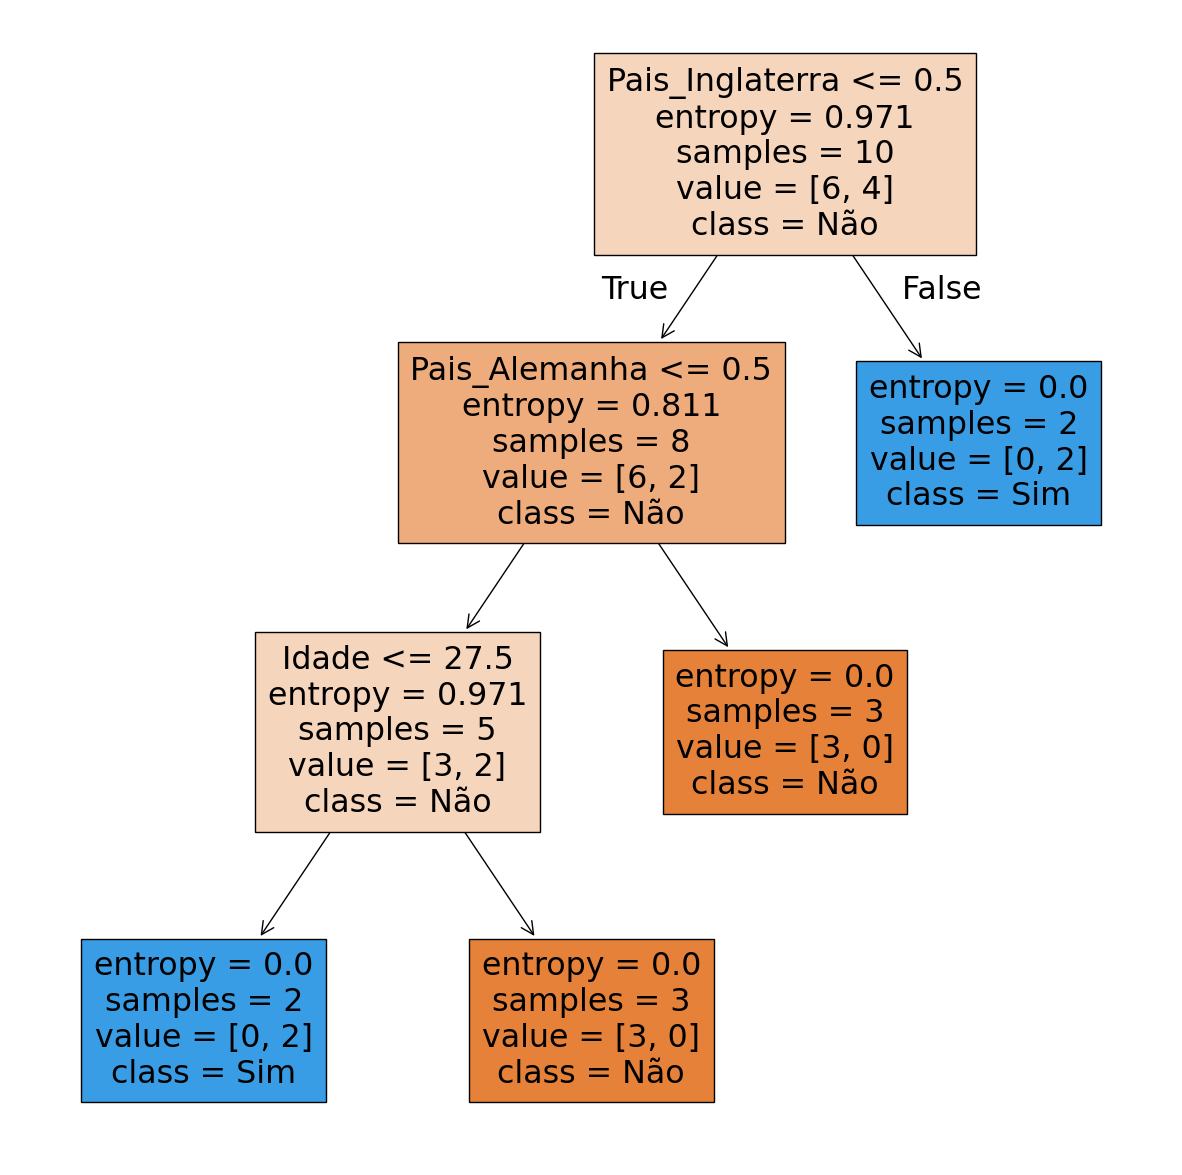

In [14]:
plt.figure(figsize=(15, 15))
plot_tree(compra_tree_model,
           feature_names=X_compra.columns, # especificando o nome das variáveis que estamos usando para a classificação
          class_names= compra_tree_model.classes_,  # especificando o nome das categorias da variável resposta 
          filled=True)
plt.show()

### <code style="color:purple">Interpretando a Árvore:</code>

Vamos analisar cada regra criada?

- Se Pais_Inglaterra <= 0.5 (Se não for da Inglaterra) E Pais_Alemanha <= 0.5 (Se não for da Alemanha) E Se a idade <= 27.5, a classe será Sim
    - mesma coisa que: Se não for da Inglaterra, nem da Alemanha, e a idade for menor ou igual a 27.5, a classe será Sim.
    - mesma coisa que: Se for França e a idade for menor ou igual a 27.5, a classe será Sim.

- Se Pais_Inglaterra <= 0.5 (Se não for da Inglaterra) E Pais_Alemanha <= 0.5 (Se não for da Alemanha) E Se a idade > 27.5, a classe será Não
    - mesma coisa que: Se não for da Inglaterra, nem da Alemanha, e a idade for maior que 27.5, a classe será Não.
    - mesma coisa que: Se for França e a idade for maior que 27.5, a classe será Não.

- Se Pais_Inglaterra <= 0.5 (Se não for da Inglaterra) E Pais_Alemanha > 0.5 (Se for da Alemanha)  a classe será Não
    - mesma coisa que: Se não for da Inglaterra, mas for da Alemanha, a classe será Não.
    - mesma coisa que: Se for da Alemanha, a classe será Não.

- Se Pais_Inglaterra > 0.5 (Se for da Inglaterra), a classe será Sim
    - mesma coisa que: Se for da Inglaterra, a classe será Sim.


### <code style="color:red">Para praticar:</code>

Agora é a sua vez!! 

Faça uma Árvore de Decisão para os dados "Seguro_Banco" com:

- min_samples_split = 10
- ccp_alpha = 0.01
- max_depth = 5
